In [9]:
from dataset_handlers import Tractoinferno_handler
from dipy.io.streamline import load_trk
import numpy as np

ds_handler = Tractoinferno_handler(r'C:\Users\pablo\GitHub\tfm_prg\tractoinferno_preprocessed_mni', scope='testset')
data = ds_handler.get_data()
print(data)
x_coords, y_coords, z_coords = [], [], []
for idx, subject_dict in enumerate(data):
    if idx == len(data) - 1:
        break
    else:
        print(idx)
    for tract in subject_dict['tracts']:
        # Cargar tracto
        tract = load_trk(str(tract), 'same', bbox_valid_check=False)
        tract = tract.streamlines

        # Obtener el maximo valor de cada coordenada para cada eje y el minimo
        max_x = [np.max(fiber[:, 0]) for fiber in tract]
        max_y = [np.max(fiber[:, 1]) for fiber in tract]
        max_z = [np.max(fiber[:, 2]) for fiber in tract]
        min_x = [np.min(fiber[:, 0]) for fiber in tract]
        min_y = [np.min(fiber[:, 1]) for fiber in tract]
        min_z = [np.min(fiber[:, 2]) for fiber in tract]

        # Obtener el maximo y minimo de cada coordenada para cada eje
        x_coords.append(max(max_x))
        y_coords.append(max(max_y))
        z_coords.append(max(max_z))
        x_coords.append(min(min_x))
        y_coords.append(min(min_y))
        z_coords.append(min(min_z))


print('Max x: ', max_x)
print('Max y: ', max_y)
print('Max z: ', max_z)
print('Min x: ', min_x)
print('Min y: ', min_y)
print('Min z: ', min_z)

    



[{'subject': 'sub-1001', 'subject_split': 'testset', 'T1w': WindowsPath('C:/Users/pablo/GitHub/tfm_prg/tractoinferno_preprocessed_mni/testset/sub-1001/anat/sub-1001__T1w.nii_mni.nii.gz'), 'tracts': [WindowsPath('C:/Users/pablo/GitHub/tfm_prg/tractoinferno_preprocessed_mni/testset/sub-1001/tractography/sub-1001__AF_L_mni2009c.trk'), WindowsPath('C:/Users/pablo/GitHub/tfm_prg/tractoinferno_preprocessed_mni/testset/sub-1001/tractography/sub-1001__AF_R_mni2009c.trk'), WindowsPath('C:/Users/pablo/GitHub/tfm_prg/tractoinferno_preprocessed_mni/testset/sub-1001/tractography/sub-1001__CC_Fr_1_mni2009c.trk'), WindowsPath('C:/Users/pablo/GitHub/tfm_prg/tractoinferno_preprocessed_mni/testset/sub-1001/tractography/sub-1001__CC_Fr_2_mni2009c.trk'), WindowsPath('C:/Users/pablo/GitHub/tfm_prg/tractoinferno_preprocessed_mni/testset/sub-1001/tractography/sub-1001__CC_Oc_mni2009c.trk'), WindowsPath('C:/Users/pablo/GitHub/tfm_prg/tractoinferno_preprocessed_mni/testset/sub-1001/tractography/sub-1001__CC_Pr

In [10]:
print("Coordenadas x: ")
print(f"Media: {np.mean(x_coords)}")
print(f"Desviación típica: {np.std(x_coords)}")
print(f"Máximo: {np.max(x_coords)}")
print(f"Mínimo{np.min(x_coords)}")

print("Coordenadas y: ")
print(f"Media: {np.mean(y_coords)}")
print(f"Desviación típica: {np.std(y_coords)}")
print(f"Máximo: {np.max(y_coords)}")
print(f"Mínimo{np.min(y_coords)}")

print("Coordenadas z: ")
print(f"Media: {np.mean(z_coords)}")
print(f"Desviación típica: {np.std(z_coords)}")
print(f"Máximo: {np.max(z_coords)}")
print(f"Mínimo{np.min(z_coords)}")


Coordenadas x: 
Media: -0.13705343008041382
Desviación típica: 46.49734878540039
Máximo: 76.03170776367188
Mínimo-73.90082550048828
Coordenadas y: 
Media: -19.238847732543945
Desviación típica: 60.372657775878906
Máximo: 77.9359130859375
Mínimo-112.23554992675781
Coordenadas z: 
Media: 14.74081039428711
Desviación típica: 50.90876388549805
Máximo: 88.72427368164062
Mínimo-79.38320922851562


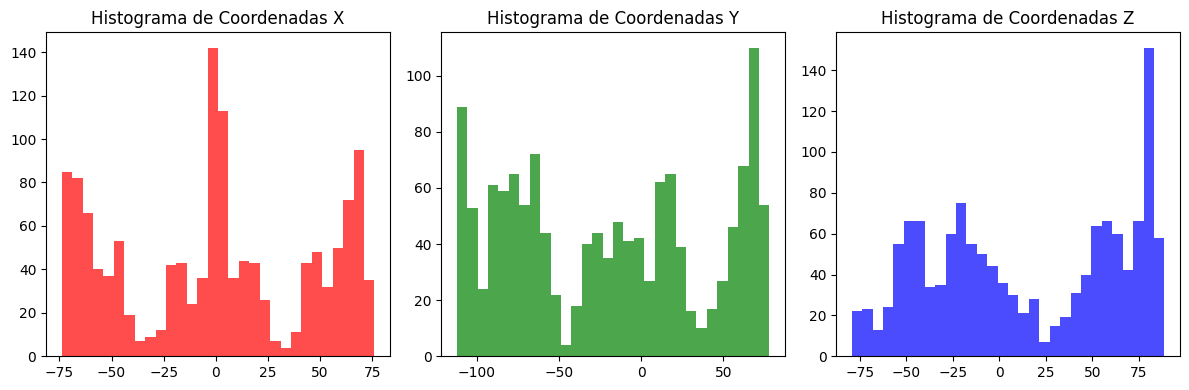

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_coordinate_histograms(x_coords, y_coords, z_coords):
    """
    Grafica histogramas para los valores de las coordenadas X, Y y Z de las fibras de longitud variable.

    :param fibers: Lista de fibras, cada una es un array de NumPy con puntos (x, y, z).
    """
    # Crear histogramas
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.hist(x_coords, bins=30, color='red', alpha=0.7)
    plt.title('Histograma de Coordenadas X')

    plt.subplot(1, 3, 2)
    plt.hist(y_coords, bins=30, color='green', alpha=0.7)
    plt.title('Histograma de Coordenadas Y')

    plt.subplot(1, 3, 3)
    plt.hist(z_coords, bins=30, color='blue', alpha=0.7)
    plt.title('Histograma de Coordenadas Z')

    plt.tight_layout()
    plt.show()

plot_coordinate_histograms(x_coords, y_coords, z_coords)